<a href="https://colab.research.google.com/github/enidroman/Data_602_Advanced_Programming_and_Techniques/blob/main/Enid_Roman_Data_602_Assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction**

In this section, please describe the dataset you are using. Include a link to the source of this data. You should also provide some explanation on why you choose this dataset.

2018 Central Park Squirrel Census - Squirrel Data 

The Squirrel Census (https://www.thesquirrelcensus.com/) is a multimedia science, design, and storytelling project focusing on the Eastern gray (Sciurus carolinensis). They count squirrels and present their findings to the public. This table contains squirrel data for each of the 3,023 sightings, including location coordinates, age, primary and secondary fur color, elevation, activities, communications, and interactions between squirrels and with humans.

Link to NYC OpenData website: https://data.cityofnewyork.us/Environment/2018-Central-Park-Squirrel-Census-Squirrel-Data/vfnx-vebw

Dataset Link: https://raw.githubusercontent.com/enidroman/Data_602_Advanced_Programming_and_Techniques/main/2018_Central_Park_Squirrel_Census_-_Squirrel_Data.csv

You can access the User Guide here : https://github.com/enidroman/Data_602_Advanced_Programming_and_Techniques/blob/main/User_Guide___Central_Park_Squirrel_Census_Data_Collection.docx

I find this data interesting because it analyze the different types of squirrels and their behaviors.

After a long search for a interesting dataset I came upon this dataset. I actually started laughing because my son and my stepson love squirrels. My son used to observed and feed the friendly squirrels at Penn State. (There is actually a squirrel name Sneezy at Penn State. Feel free to google it.) Also stepson is a photographer and he takes pictures and feed the squirrels in New York. I thought it would be interesting and fun to analyze this dataset.

Please note the following:

I've continued to use this dataset for my visiualization on  Asssignment 8 with some minor changes to Data Wrangling. I renamed x and y columns to longtitude and latitude and decided to keep these 2 columns instead of dropping them because I will be using these columns for visualization. 

I converted date type from int64 to datetime. 

I also found 4 "?" in Age column which I replaced the ? to Unknown.  

I created a dataframes for Age, a dataframe for Primary Fur Color, dataframe for Date, and dataframe for Shift.

I created groupby with count of each Age, Primary Fur Color, the count of squirrels seen each date, and the count of squirrels for each shift. 

## **Data Exploration**

Import your dataset into your .ipynb, create dataframes, and explore your data.

Include:

* Summary statistics means, medians, quartiles,
* Missing value information
* Any other relevant information about the dataset.


In [57]:
# Load the pandas package.
import pandas as pd
import numpy as np

In [58]:
# Load the dataset after is saved in github.
df = pd.read_csv('https://raw.githubusercontent.com/enidroman/Data_602_Advanced_Programming_and_Techniques/main/2018_Central_Park_Squirrel_Census_-_Squirrel_Data.csv')

Below is the summary statistics. 

We first see a preview of the first 5 rows and the last 5 rows of the data.

In [59]:
# Previewed the data by calling your dataframe’s name. 
# This shows the first 5 rows and last 5 rows of the dataset. 
df

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,NaN,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3018,-73.963943,40.790868,30B-AM-1007-04,30B,AM,10072018,4,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9639431360458 40.7908677445466)
3019,-73.970402,40.782560,19A-PM-1013-05,19A,PM,10132018,5,Adult,Gray,White,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9704015859639 40.7825600069973)
3020,-73.966587,40.783678,22D-PM-1012-07,22D,PM,10122018,7,Adult,Gray,"Black, Cinnamon, White",...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9665871993517 40.7836775064883)
3021,-73.963994,40.789915,29B-PM-1010-02,29B,PM,10102018,2,NaN,Gray,"Cinnamon, White",...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9639941227864 40.7899152327912)


There are 3023 rows and 31 columns.

In [60]:
# .shape will display the number of observations(rows) and features(columns) 
# in the dataset.
df.shape

(3023, 31)

This returns RangeIndex object with the start of 0, stop of 3023 and step of 1.

In [61]:
# The index property returns the index (row labels) information of the 
# DataFrame. The index information contains the labels of the rows. If the rows
# has NOT named indexes, the index property returns a RangeIndex object with the 
# start, stop, and step values. (either row numbers or row names.)
df.index

RangeIndex(start=0, stop=3023, step=1)

Numpy representation of the DataFrame without any index or columns names. 

In [62]:
# Return a Numpy representation of the DataFrame. .values returns a numpy 
# array with the underlying data of the DataFrame, without any index or columns 
# names.
df.values

array([[-73.95613449, 40.79408239, '37F-PM-1014-03', ..., False, nan,
        'POINT (-73.9561344937861 40.7940823884086)'],
       [-73.96885747, 40.78378252, '21B-AM-1019-04', ..., False, nan,
        'POINT (-73.9688574691102 40.7837825208444)'],
       [-73.97428115, 40.77553362, '11B-PM-1014-08', ..., False, nan,
        'POINT (-73.97428114848522 40.775533619083)'],
       ...,
       [-73.9665872, 40.78367751, '22D-PM-1012-07', ..., False, nan,
        'POINT (-73.9665871993517 40.7836775064883)'],
       [-73.96399412, 40.78991523, '29B-PM-1010-02', ..., False, nan,
        'POINT (-73.9639941227864 40.7899152327912)'],
       [-73.97547942, 40.76964045, '5E-PM-1012-01', ..., False, nan,
        'POINT (-73.9754794191553 40.7696404489025)']], dtype=object)

**Columns in this Dataset**

X	- Longitude coordinate for squirrel sighting point - Data Type : Number

Y	- Latitude coordinate for squirrel sighting point - Data Type : Number

Unique Squirrel ID - Identification tag for each squirrel sightings. The tag is comprised of "Hectare ID" + "Shift" + "Date" + "Hectare Squirrel Number." - Data Type : Plain Text

Hectare	- ID tag, which is derived from the hectare grid used to divide and count the park area. One axis that runs predominantly north-to-south is numerical (1-42), and the axis that runs predominantly east-to-west is roman characters (A-I). - Data Type : Plain Text

Shift	- Value is either "AM" or "PM," to communicate whether or not the sighting session occurred in the morning or late afternoon. - Data Type : Plain Text

Date - Concatenation of the sighting session day and month. - Data Type : Plain Text

Hectare Squirrel Number	- Number within the chronological sequence of squirrel sightings for a discrete sighting session. - Data Type : Number

Age	- Value is either "Adult" or "Juvenile." - Data Type : Plain Text 

Primary Fur Color	- Value is either "Gray," "Cinnamon" or "Black." - Data Type : Plain Text 

Highlight Fur Color - Discrete value or string values comprised of "Gray," "Cinnamon" or "Black." Data Type - Plain Text  

Combination of Primary and Highlight Color - 	A combination of the previous two columns; this column gives the total permutations of primary and highlight colors observed. - Data Type: Plain Text

Color notes	- Sighters occasionally added commentary on the squirrel fur conditions. These notes are provided here. Data Type : Plain Text

Location - Value is either "Ground Plane" or "Above Ground." Sighters were instructed to indicate the location of where the squirrel was when first sighted. - Data Type : Plain Text

Above Ground Sighter Measurement : 	For squirrel sightings on the ground plane, fields were populated with a value of “FALSE.” - Data Type: Plain Text

Specific Location	- Sighters occasionally added commentary on the squirrel location. These notes are provided here. - Data Type : Plain Text

Running	- Squirrel was seen running. - Data Type : Checkbox

Chasing	- Squirrel was seen chasing another squirrel. - Data Type : Checkbox

Climbing - Squirrel was seen climbing a tree or other environmental landmark. - Data Type : Checkbox

Eating - Squirrel was seen eating. - Data Type : Checkbox

Foraging - Squirrel was seen foraging for food. - Data Type : Checkbox

Other Activities - Data Type : Plain Text

Kuks - Squirrel was heard kukking, a chirpy vocal communication used for a variety of reasons. - Data Type : Checkbox

Quaas	- Squirrel was heard quaaing, an elongated vocal communication which can indicate the presence of a ground predator such as a dog. - Data Type : Checkbox

Moans	- Squirrel was heard moaning, a high-pitched vocal communication which can indicate the presence of an air predator such as a hawk. - Data Type : Checkbox

Tail flags - Squirrel was seen flagging its tail. Flagging is a whipping motion used to exaggerate squirrel's size and confuse rivals or predators. Looks as if the squirrel is scribbling with tail into the air. - Data Type : Checkbox

Tail twitches	- Squirrel was seen twitching its tail. Looks like a wave running through the tail, like a breakdancer doing the arm wave. Often used to communicate interest, curiosity. - Data Type : Checkbox

Approaches - Squirrel was seen approaching human, seeking food. - Data Type : Checkbox

Indifferent	- Squirrel was indifferent to human presence. - Data Type : Checkbox

Runs from	- Squirrel was seen running from humans, seeing them as a threat. Data Type : Checkbox

Other Interactions - Sighter notes on other types of interactions between squirrels and humans. - Data Type : Plain Text

Lat/Long - Latitude and longitude - Data Type : Point

In [63]:
# .columns displays the columns name. 
df.columns

Index(['X', 'Y', 'Unique Squirrel ID', 'Hectare', 'Shift', 'Date',
       'Hectare Squirrel Number', 'Age', 'Primary Fur Color',
       'Highlight Fur Color', 'Combination of Primary and Highlight Color',
       'Color notes', 'Location', 'Above Ground Sighter Measurement',
       'Specific Location', 'Running', 'Chasing', 'Climbing', 'Eating',
       'Foraging', 'Other Activities', 'Kuks', 'Quaas', 'Moans', 'Tail flags',
       'Tail twitches', 'Approaches', 'Indifferent', 'Runs from',
       'Other Interactions', 'Lat/Long'],
      dtype='object')

The data types are : 13 bools, 2 floats, 2 ints, 14 objects. There are 3023 entries, from index 0 to 3023. Each records in each columns containing non-null values, meaning there are no missing value in this dataset.

In [64]:
# .info helps to understand the data type and information about data, 
# including the number of records in each column, data having null or not null, 
# Data type, the memory usage of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   X                                           3023 non-null   float64
 1   Y                                           3023 non-null   float64
 2   Unique Squirrel ID                          3023 non-null   object 
 3   Hectare                                     3023 non-null   object 
 4   Shift                                       3023 non-null   object 
 5   Date                                        3023 non-null   int64  
 6   Hectare Squirrel Number                     3023 non-null   int64  
 7   Age                                         2902 non-null   object 
 8   Primary Fur Color                           2968 non-null   object 
 9   Highlight Fur Color                         1937 non-null   object 
 10  Combination 

There are several unique values in each column and the data description. Duplicated data can be handled or removed based on further analysis. Here I believe it is normal to have duplicate values.

In [65]:
# .nunique is based on several unique values in each column and the data 
# description, we can identify the continuous and categorical columns in the 
# data. 
df.nunique()

X                                             3020
Y                                             3021
Unique Squirrel ID                            3018
Hectare                                        339
Shift                                            2
Date                                            11
Hectare Squirrel Number                         23
Age                                              3
Primary Fur Color                                3
Highlight Fur Color                             10
Combination of Primary and Highlight Color      22
Color notes                                    135
Location                                         2
Above Ground Sighter Measurement                41
Specific Location                              304
Running                                          2
Chasing                                          2
Climbing                                         2
Eating                                           2
Foraging                       

Age, Primary Fur Color, Highlight Fur Color, Color notes, Location, Above Ground Sighter Measurement, Specific Location, Other Activities, and Other Interactions have missing values. 

In [66]:
# isnull(). Values. any() method to check if there are any missing data in 
# pandas DataFrame, missing data is represented as NaN or None values in 
# DataFrame. When your data contains NaN or None, using this method returns the 
# boolean value True otherwise returns False .
df.isnull().any()

X                                             False
Y                                             False
Unique Squirrel ID                            False
Hectare                                       False
Shift                                         False
Date                                          False
Hectare Squirrel Number                       False
Age                                            True
Primary Fur Color                              True
Highlight Fur Color                            True
Combination of Primary and Highlight Color    False
Color notes                                    True
Location                                       True
Above Ground Sighter Measurement               True
Specific Location                              True
Running                                       False
Chasing                                       False
Climbing                                      False
Eating                                        False
Foraging    

This gives us the total of missing values that are in each columns.  

In [67]:
# .isnull.sum is used to get the number of missing records in each column.
df.isnull().sum()

X                                                0
Y                                                0
Unique Squirrel ID                               0
Hectare                                          0
Shift                                            0
Date                                             0
Hectare Squirrel Number                          0
Age                                            121
Primary Fur Color                               55
Highlight Fur Color                           1086
Combination of Primary and Highlight Color       0
Color notes                                   2841
Location                                        64
Above Ground Sighter Measurement               114
Specific Location                             2547
Running                                          0
Chasing                                          0
Climbing                                         0
Eating                                           0
Foraging                       

There are no duplicate rows.

In [68]:
# .duplicated().sum() identifying relevant data and finds duplicate rows.
print("number of duplicate rows:", df.duplicated().sum())
print("row number:", np.where(df.duplicated()== True)[0])

number of duplicate rows: 0
row number: []


In [69]:
# .describe provides a statistics summary of data belonging to numerical 
# datatype such as int, float.
# This includes the count, mean, std, min, max as well as lower, 50 and upper 
# percentiles. 
# By default the lower percentile is 25 and the upper percentile is 75. 
# The 50 percentile is the same as the median.
df.describe()

,X,Y,Date,Hectare Squirrel Number
count,3023.000000,3023.000000,3.023000e+03,3023.000000
mean,-73.967184,40.780853,1.011949e+07,4.123718
std,0.007726,0.010285,4.246671e+04,3.096492
min,-73.981159,40.764911,1.006202e+07,1.000000
25%,-73.973102,40.771676,1.008202e+07,2.000000
50%,-73.968594,40.778166,1.012202e+07,3.000000
75%,-73.960189,40.791219,1.014202e+07,6.000000
max,-73.949722,40.800119,1.020202e+07,23.000000


In [70]:
# .std returns sample standard deviation over requested axis. Removed the columns that was needed for standard deviation.
df.iloc[:, ~df.columns.isin(['X', 'Y', 'Date', 'Hectare Squirrel Number'])].std()

<ipython-input-70-cb7401d08f6d>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.iloc[:, ~df.columns.isin(['X', 'Y', 'Date', 'Hectare Squirrel Number'])].std()


Running          0.428053
Chasing          0.289486
Climbing         0.412726
Eating           0.433893
Foraging         0.499442
Kuks             0.180592
Quaas            0.127560
Moans            0.031492
Tail flags       0.220592
Tail twitches    0.350707
Approaches       0.235442
Indifferent      0.499721
Runs from        0.417177
dtype: float64

array([[<Axes: title={'center': 'X'}>, <Axes: title={'center': 'Y'}>],
       [<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Hectare Squirrel Number'}>]],
      dtype=object)

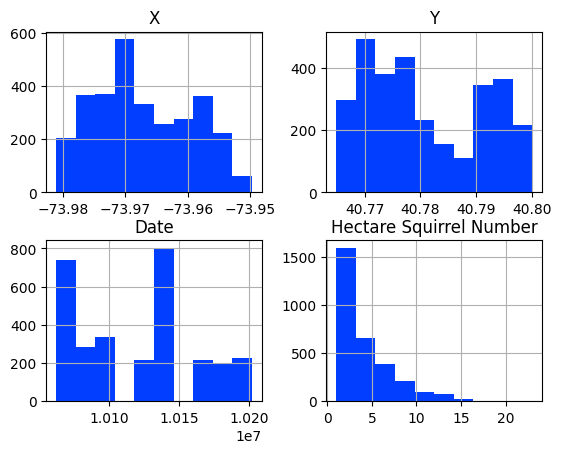

In [71]:
# .hist gives the measurement of each variables from the columns.
df.hist()

# **Data Wrangling**

Create a subset of your original data to perform the data wrangling. 

In [72]:
# Renamed the the dataframe from df to sq. 
sq = df
sq.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,NaN,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)


1. Modify multiple column names.

I renamed columns Unique Squirrel ID, Hectare, Above Ground Sighter Measurement.

In [73]:
# .rename renames multiple columns by index. 
sq.rename(columns={sq.columns[0]: 'Longtitude', sq.columns[1]: 'Latitude', sq.columns[2]: 'Squirrel ID', sq.columns[3]: 'Location', sq.columns[13]: 'Above Ground Sighter'},inplace=True)
sq.head()

,Longtitude,Latitude,Squirrel ID,Location,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,NaN,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)


2. Look at the structure of your data – are any variables improperly coded? Such as strings or characters? Convert to correct structure if needed. 

The date is improperly coded. Need to convert from int64 to datetime format.

Had to do this procedure after converting booleans to numbers. Otherwise I will not be able to perform this procedure. See below.

In [74]:
# Return the dtypes in the DataFrame.
print (df.dtypes['Date'])

int64


3. Fix missing and invalid values in data.

I replaced the + to Unknown in the Combination of Primary and Highlight Color column. I returned just the column where I made the change.

In [75]:
# .replace() method replaces the specified value with another specified value.
# .replace() method searches the entire DataFrame and replaces every case of the specified value.
squ = sq.replace('+', 'Unknown')
squ["Combination of Primary and Highlight Color"]

0                           Unknown
1                           Unknown
2                             Gray+
3                             Gray+
4                     Gray+Cinnamon
                   ...             
3018                          Gray+
3019                     Gray+White
3020    Gray+Black, Cinnamon, White
3021           Gray+Cinnamon, White
3022           Cinnamon+Gray, White
Name: Combination of Primary and Highlight Color, Length: 3023, dtype: object

I replaced the ? to Unknown in the Age column. I returned just the column where I made the change.

In [76]:
squ = sq.replace('?', 'Unknown')
squ["Age"]

0         NaN
1         NaN
2         NaN
3       Adult
4       Adult
        ...  
3018    Adult
3019    Adult
3020    Adult
3021      NaN
3022    Adult
Name: Age, Length: 3023, dtype: object

I replaced the NaN to Unknown.

In [77]:
# .fillna() method replaces the NULL values with a specified value. I also added
# inplace=True so the replacement can be permanent. 
squ_unk = squ
squ_unk.fillna('Unknown', inplace=True)
squ_unk.head()

,Longtitude,Latitude,Squirrel ID,Location,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,Unknown,Unknown,Unknown,...,False,False,False,False,False,False,False,False,Unknown,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,Unknown,Unknown,Unknown,...,False,False,False,False,False,False,False,False,Unknown,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,Unknown,Gray,Unknown,...,False,False,False,False,False,False,False,False,Unknown,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,Unknown,...,False,False,False,False,False,False,False,True,Unknown,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,Unknown,POINT (-73.9702676472613 40.7762126854894)


I replaced True to 1 and False to 0 for better counting. 

In [78]:
# df*1, converts booleans to numbers. To get 1 and 0 values instead of TRUE or
# FALSE logical values, simply multiply the expression by 1. 
squnum= squ_unk*1
squnum.head()

,Longtitude,Latitude,Squirrel ID,Location,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,Unknown,Unknown,Unknown,...,0,0,0,0,0,0,0,0,Unknown,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,Unknown,Unknown,Unknown,...,0,0,0,0,0,0,0,0,Unknown,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,Unknown,Gray,Unknown,...,0,0,0,0,0,0,0,0,Unknown,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,Unknown,...,0,0,0,0,0,0,0,1,Unknown,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,0,0,0,0,0,0,0,0,Unknown,POINT (-73.9702676472613 40.7762126854894)


2. Convert column date from int64 to datetime format.

In [79]:
# This function converts a scalar, array-like, Series or DataFrame/dict-like to 
# a pandas datetime object.
squnum['Date'] = pd.to_datetime(squnum['Date'], format='%m%d%Y')

Checked now if date is properly formated.

In [80]:
# Return the dtypes in the DataFrame.
print (df.dtypes['Date'])

int64


4. Create new columns based on existing columns or calculations.

I created a new dataframe called squactivpivoted, where I created a new column based on existing columns. Please see a couple codes below. 

5. Drop column(s) from your dataset.

I removed Color notes, Above Ground Sighter, and Lat/Long columns, since I will
not be using these columns. 

In [81]:
# The .drop() method removes the specified row or column. By specifying the 
# column axis ( axis='columns' ), the drop() method removes the specified 
# column.
squcol = squnum
squcol.drop(['Color notes','Above Ground Sighter','Lat/Long'], axis = 1, inplace = True)
squcol.head()

,Longtitude,Latitude,Squirrel ID,Location,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Other Activities,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,2018-10-14,3,Unknown,Unknown,Unknown,...,Unknown,0,0,0,0,0,0,0,0,Unknown
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,2018-10-19,4,Unknown,Unknown,Unknown,...,Unknown,0,0,0,0,0,0,0,0,Unknown
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,2018-10-14,8,Unknown,Gray,Unknown,...,Unknown,0,0,0,0,0,0,0,0,Unknown
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,2018-10-17,14,Adult,Gray,Unknown,...,Unknown,0,0,0,0,0,0,0,1,Unknown
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,2018-10-17,5,Adult,Gray,Cinnamon,...,Unknown,0,0,0,0,0,0,0,0,Unknown


6. Drop a row(s) from your dataset. 

I also reset the index with drop = True to reset the index # permanently. 




In [82]:
# df.dropdf.index removes rows or columns by specifying label names and 
# corresponding axis, or by specifying directly index or column names. When 
# using a multi-index, labels on different levels can be removed by specifying 
# the level. 
# .reset_index resets the index of the DataFrame, and use the default one 
# instead. If the DataFrame has a MultiIndex, this method can remove one or 
# more levels.
squrow = squcol.drop(squcol.index[[0,1]]).reset_index(drop = True)
squrow.head()

,Longtitude,Latitude,Squirrel ID,Location,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Other Activities,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions
0,-73.974281,40.775534,11B-PM-1014-08,11B,PM,2018-10-14,8,Unknown,Gray,Unknown,...,Unknown,0,0,0,0,0,0,0,0,Unknown
1,-73.959641,40.790313,32E-PM-1017-14,32E,PM,2018-10-17,14,Adult,Gray,Unknown,...,Unknown,0,0,0,0,0,0,0,1,Unknown
2,-73.970268,40.776213,13E-AM-1017-05,13E,AM,2018-10-17,5,Adult,Gray,Cinnamon,...,Unknown,0,0,0,0,0,0,0,0,Unknown
3,-73.968361,40.772591,11H-AM-1010-03,11H,AM,2018-10-10,3,Adult,Cinnamon,White,...,Unknown,0,0,0,0,1,0,1,0,Unknown
4,-73.954120,40.793181,36H-AM-1010-02,36H,AM,2018-10-10,2,Adult,Gray,Unknown,...,Unknown,0,0,0,0,0,0,0,0,Unknown


7. Sort your data based on multiple variables.

In [83]:
# .sort_values() method sorts the DataFrame by the specified label. ascending	
# True or False	Optional, default True. Specifies whether to sort ascending 
#(0 -> 9) or descending (9 -> 0)
squasc = squrow.sort_values(["Date", "Shift"], ascending = True)
squasc

,Longtitude,Latitude,Squirrel ID,Location,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Other Activities,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions
12,-73.970611,40.769812,7H-AM-1006-05,07H,AM,2018-10-06,5,Adult,Gray,Cinnamon,...,Unknown,0,0,0,0,0,0,1,0,Unknown
25,-73.973803,40.771185,7E-AM-1006-02,07E,AM,2018-10-06,2,Adult,Gray,Unknown,...,Unknown,0,0,0,0,0,0,0,0,Unknown
83,-73.978718,40.771588,5A-AM-1006-05,05A,AM,2018-10-06,5,Adult,Gray,Cinnamon,...,Unknown,0,0,0,1,0,0,0,1,Unknown
93,-73.976159,40.774721,10A-AM-1006-04,10A,AM,2018-10-06,4,Juvenile,Gray,Unknown,...,walking on branch,0,0,0,0,1,0,0,0,Unknown
97,-73.976404,40.770585,5C-AM-1006-05,05C,AM,2018-10-06,5,Adult,Gray,"Cinnamon, White",...,Unknown,0,0,0,0,0,0,1,0,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2756,-73.954337,40.794389,38G-PM-1020-07,38G,PM,2018-10-20,7,Adult,Gray,Cinnamon,...,Unknown,0,1,0,1,0,0,1,0,Unknown
2858,-73.972010,40.769214,6G-PM-1020-01,06G,PM,2018-10-20,1,Adult,Gray,Unknown,...,Unknown,0,0,0,0,0,0,1,0,Unknown
2970,-73.976669,40.770888,6C-PM-1020-01,06C,PM,2018-10-20,1,Adult,Gray,White,...,Unknown,0,0,0,0,0,0,1,0,Unknown
2999,-73.971099,40.768983,6H-PM-1020-01,06H,PM,2018-10-20,1,Adult,Gray,"Cinnamon, White",...,Unknown,0,0,0,0,0,0,1,0,Unknown


8. Filter your data based on some condition.

In [84]:
# df.loc[df['col1'] == value] selects Rows where Column is Equal to Specific 
# Value
squgrey=squasc[squasc["Primary Fur Color"] == 'Gray'] 
squgrey.head()

,Longtitude,Latitude,Squirrel ID,Location,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Other Activities,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions
12,-73.970611,40.769812,7H-AM-1006-05,07H,AM,2018-10-06,5,Adult,Gray,Cinnamon,...,Unknown,0,0,0,0,0,0,1,0,Unknown
25,-73.973803,40.771185,7E-AM-1006-02,07E,AM,2018-10-06,2,Adult,Gray,Unknown,...,Unknown,0,0,0,0,0,0,0,0,Unknown
83,-73.978718,40.771588,5A-AM-1006-05,05A,AM,2018-10-06,5,Adult,Gray,Cinnamon,...,Unknown,0,0,0,1,0,0,0,1,Unknown
93,-73.976159,40.774721,10A-AM-1006-04,10A,AM,2018-10-06,4,Juvenile,Gray,Unknown,...,walking on branch,0,0,0,0,1,0,0,0,Unknown
97,-73.976404,40.770585,5C-AM-1006-05,05C,AM,2018-10-06,5,Adult,Gray,"Cinnamon, White",...,Unknown,0,0,0,0,0,0,1,0,Unknown


9. Convert all the string values to upper or lower cases in one column.

In [85]:
# str.upper() converts strings in the Series/Index to uppercase.
squage = squgrey
squage['Age'] = squage['Age'].str.upper()
squage.head()

<ipython-input-85-dbfcebfdd66a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  squage['Age'] = squage['Age'].str.upper()


,Longtitude,Latitude,Squirrel ID,Location,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Other Activities,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions
12,-73.970611,40.769812,7H-AM-1006-05,07H,AM,2018-10-06,5,ADULT,Gray,Cinnamon,...,Unknown,0,0,0,0,0,0,1,0,Unknown
25,-73.973803,40.771185,7E-AM-1006-02,07E,AM,2018-10-06,2,ADULT,Gray,Unknown,...,Unknown,0,0,0,0,0,0,0,0,Unknown
83,-73.978718,40.771588,5A-AM-1006-05,05A,AM,2018-10-06,5,ADULT,Gray,Cinnamon,...,Unknown,0,0,0,1,0,0,0,1,Unknown
93,-73.976159,40.774721,10A-AM-1006-04,10A,AM,2018-10-06,4,JUVENILE,Gray,Unknown,...,walking on branch,0,0,0,0,1,0,0,0,Unknown
97,-73.976404,40.770585,5C-AM-1006-05,05C,AM,2018-10-06,5,ADULT,Gray,"Cinnamon, White",...,Unknown,0,0,0,0,0,0,1,0,Unknown


10. Check whether numeric values are present in a given column of your dataframe.

In [86]:
# np.issubdtype() function by passing the specific column to the function as a 
#parameter along with the np.number which returns the boolean value of True or 
#False.
np.issubdtype(squage['Hectare Squirrel Number'].dtype, np.number)


True

4. Create new columns based on existing columns or calculations.

Before doing a groupby to do an analysis of the squirrel's activities I created a new dataframe and created a new column call activity. 

In [87]:
# Using datadrame.copy() create new dataframe.
squactiv = squnum[['Squirrel ID','Running', 'Chasing', 'Climbing', 'Eating', 'Foraging', 'Tail flags', 'Tail twitches']].copy()
squactiv

,Squirrel ID,Running,Chasing,Climbing,Eating,Foraging,Tail flags,Tail twitches
0,37F-PM-1014-03,0,0,0,0,0,0,0
1,21B-AM-1019-04,0,0,0,0,0,0,0
2,11B-PM-1014-08,0,1,0,0,0,0,0
3,32E-PM-1017-14,0,0,0,1,1,0,0
4,13E-AM-1017-05,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
3018,30B-AM-1007-04,0,0,0,1,1,0,0
3019,19A-PM-1013-05,0,0,0,0,1,0,0
3020,22D-PM-1012-07,0,0,0,1,1,0,0
3021,29B-PM-1010-02,0,0,0,1,0,0,0


In [88]:
# Pandas.melt() unpivots a DataFrame from wide format to long format. melt() 
# function is useful to massage a DataFrame into a format where one or more 
# columns are identifier variables, while all other columns, considered measured 
# variables, are unpivoted to the row axis, leaving just two non-identifier 
# columns, variable and value. 
# I renamed the columns with .rename
squactivpivoted= squactiv.melt(id_vars="Squirrel ID")
squactivpivoted = squactivpivoted.rename(columns={'variable': 'Activity', 'value': 'Count'})
squactivpivoted.head(10)

,Squirrel ID,Activity,Count
0,37F-PM-1014-03,Running,0
1,21B-AM-1019-04,Running,0
2,11B-PM-1014-08,Running,0
3,32E-PM-1017-14,Running,0
4,13E-AM-1017-05,Running,0
5,11H-AM-1010-03,Running,0
6,36H-AM-1010-02,Running,0
7,33F-AM-1008-02,Running,0
8,21C-PM-1006-01,Running,0
9,11D-AM-1010-03,Running,0


11. Group your dataset by one column, and get the mean, min, and max values by group.

* Groupby()
* agg() or .apply()

In [89]:
# A groupby operation involves some combination of splitting the object, 
# applying a function, and combining the results. This can be used to group 
# large amounts of data and compute operations on these groups.
# an aggregation function is one which takes multiple individual values and 
# returns a summary. In the majority of the cases, this summary is a single 
# value.
result1 = squactivpivoted.groupby('Activity').agg({'Count': ['sum','mean', 'min', 'max']})
result1

Count                  
                sum      mean min max
Activity                             
Chasing         279  0.092292   0   1
Climbing        658  0.217665   0   1
Eating          760  0.251406   0   1
Foraging       1435  0.474694   0   1
Running         730  0.241482   0   1
Tail flags      155  0.051274   0   1
Tail twitches   434  0.143566   0   1

12. Group your dataset by two columns and then sort the aggregated results within the groups.

For squirrels activity there were 1435 squirrels that were foraging, 760 eating, 730 running, 658 climbing, 434 Tail twitches, 279 chasing, and 155 Tail flags.  

In [90]:
# groupby() function takes up the column name as argument followed by sum() 
# function andreset_index() function resets and provides the new index to the 
# grouped by dataframe and makes them a proper dataframe structure 
# sort_values(by=) method sorts the DataFrame by the specified label.
result2 = squactivpivoted.groupby('Activity').sum().reset_index()
result2.sort_values(by='Count') 

<ipython-input-90-7638ef31df80>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result2 = squactivpivoted.groupby('Activity').sum().reset_index()


,Activity,Count
5,Tail flags,155
0,Chasing,279
6,Tail twitches,434
1,Climbing,658
4,Running,730
2,Eating,760
3,Foraging,1435


In [91]:
squasound = squnum[['Squirrel ID', 'Kuks',	'Quaas','Moans']].copy()
squasound

,Squirrel ID,Kuks,Quaas,Moans
0,37F-PM-1014-03,0,0,0
1,21B-AM-1019-04,0,0,0
2,11B-PM-1014-08,0,0,0
3,32E-PM-1017-14,0,0,0
4,13E-AM-1017-05,0,0,0
...,...,...,...,...
3018,30B-AM-1007-04,0,0,0
3019,19A-PM-1013-05,0,0,0
3020,22D-PM-1012-07,0,0,0
3021,29B-PM-1010-02,0,0,0


In [92]:
squasoundpivoted= squasound.melt(id_vars="Squirrel ID")
squasoundpivoted = squasoundpivoted.rename(columns={'variable': 'Sound', 'value': 'Count'})
squasoundpivoted.head(10)

,Squirrel ID,Sound,Count
0,37F-PM-1014-03,Kuks,0
1,21B-AM-1019-04,Kuks,0
2,11B-PM-1014-08,Kuks,0
3,32E-PM-1017-14,Kuks,0
4,13E-AM-1017-05,Kuks,0
5,11H-AM-1010-03,Kuks,0
6,36H-AM-1010-02,Kuks,0
7,33F-AM-1008-02,Kuks,0
8,21C-PM-1006-01,Kuks,0
9,11D-AM-1010-03,Kuks,0


For squirrels sound there were 102 squirrels that made Kuks sound, 50 that made Quaas, and 3 that Moans. 



In [93]:
resultsound= squasoundpivoted.groupby('Sound').sum().reset_index()
resultsound.sort_values(by='Count')

<ipython-input-93-d50cb641a6da>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  resultsound= squasoundpivoted.groupby('Sound').sum().reset_index()


,Sound,Count
1,Moans,3
2,Quaas,50
0,Kuks,102


In [94]:
squabehavior = squnum[['Squirrel ID', 'Approaches',	'Indifferent','Runs from']].copy()
squabehavior

,Squirrel ID,Approaches,Indifferent,Runs from
0,37F-PM-1014-03,0,0,0
1,21B-AM-1019-04,0,0,0
2,11B-PM-1014-08,0,0,0
3,32E-PM-1017-14,0,0,1
4,13E-AM-1017-05,0,0,0
...,...,...,...,...
3018,30B-AM-1007-04,0,0,1
3019,19A-PM-1013-05,0,1,0
3020,22D-PM-1012-07,0,1,0
3021,29B-PM-1010-02,0,1,0


In [95]:
squabehaviorpivoted= squabehavior.melt(id_vars="Squirrel ID")
squabehaviorpivoted = squabehaviorpivoted.rename(columns={'variable': 'Behavior Towards Human', 'value': 'Count'})
squabehaviorpivoted.head(10)

,Squirrel ID,Behavior Towards Human,Count
0,37F-PM-1014-03,Approaches,0
1,21B-AM-1019-04,Approaches,0
2,11B-PM-1014-08,Approaches,0
3,32E-PM-1017-14,Approaches,0
4,13E-AM-1017-05,Approaches,0
5,11H-AM-1010-03,Approaches,0
6,36H-AM-1010-02,Approaches,0
7,33F-AM-1008-02,Approaches,0
8,21C-PM-1006-01,Approaches,0
9,11D-AM-1010-03,Approaches,0


For squirrels behavior towards human there were 1454 squirrel that reacted indifferent towards human, 678 ran away from human, and 178 approach humans. 

In [96]:
resultbehavior= squabehaviorpivoted.groupby('Behavior Towards Human').sum().reset_index()
resultbehavior.sort_values(by='Count')

<ipython-input-96-f9d42451b51b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  resultbehavior= squabehaviorpivoted.groupby('Behavior Towards Human').sum().reset_index()


,Behavior Towards Human,Count
0,Approaches,178
2,Runs from,678
1,Indifferent,1454


In [97]:
squaage = squnum[['Squirrel ID', 'Age']].copy()
squaage

,Squirrel ID,Age
0,37F-PM-1014-03,Unknown
1,21B-AM-1019-04,Unknown
2,11B-PM-1014-08,Unknown
3,32E-PM-1017-14,Adult
4,13E-AM-1017-05,Adult
...,...,...
3018,30B-AM-1007-04,Adult
3019,19A-PM-1013-05,Adult
3020,22D-PM-1012-07,Adult
3021,29B-PM-1010-02,Unknown


For squirrels Age there were 2568 squirrel that were Adult, 330 Juvenile, and 125 Unknown.

In [98]:
resultage = squaage.groupby(['Age']).size().reset_index(name='Count')
resultage.sort_values(by='Count')

,Age,Count
2,Unknown,125
1,Juvenile,330
0,Adult,2568


In [99]:
squafurcolor = squnum[['Squirrel ID', 'Primary Fur Color']].copy()
squafurcolor

,Squirrel ID,Primary Fur Color
0,37F-PM-1014-03,Unknown
1,21B-AM-1019-04,Unknown
2,11B-PM-1014-08,Gray
3,32E-PM-1017-14,Gray
4,13E-AM-1017-05,Gray
...,...,...
3018,30B-AM-1007-04,Gray
3019,19A-PM-1013-05,Gray
3020,22D-PM-1012-07,Gray
3021,29B-PM-1010-02,Gray


For squirrels primary fur color there were 2473 squirrel that were Gray, 392 Cinnamon, 103 Black, and 55 Unknown.

In [100]:
resultfurcolor = squafurcolor.groupby(['Primary Fur Color']).size().reset_index(name='Count')
resultfurcolor.sort_values(by='Count')

,Primary Fur Color,Count
3,Unknown,55
0,Black,103
1,Cinnamon,392
2,Gray,2473


In [101]:
squadate = squnum[['Squirrel ID', 'Date']].copy()
squadate

,Squirrel ID,Date
0,37F-PM-1014-03,2018-10-14
1,21B-AM-1019-04,2018-10-19
2,11B-PM-1014-08,2018-10-14
3,32E-PM-1017-14,2018-10-17
4,13E-AM-1017-05,2018-10-17
...,...,...
3018,30B-AM-1007-04,2018-10-07
3019,19A-PM-1013-05,2018-10-13
3020,22D-PM-1012-07,2018-10-12
3021,29B-PM-1010-02,2018-10-10


For squirrels counts per each day there were 434 squirrels that were seen on 10/13/2018, 405 on 10/7/2018, 368 on       10/14/2018, 337 on 10/6/2018, 335 on 10/10/2018, 285 on 
10/8/2018, 218 on 10/12/2018, 216 on 10/17/2018, 200 on 
10/18/2018, 158 on 10/19/2018, and 67 on 10/20/2018.

In [102]:
resultdate = squadate.groupby(['Date']).size().reset_index(name='Count')
resultdate.sort_values(by='Count')

,Date,Count
10,2018-10-20,67
9,2018-10-19,158
8,2018-10-18,200
7,2018-10-17,216
4,2018-10-12,218
2,2018-10-08,285
3,2018-10-10,335
0,2018-10-06,337
6,2018-10-14,368
1,2018-10-07,405


In [103]:
squashift = squnum[['Squirrel ID', 'Shift']].copy()
squashift

,Squirrel ID,Shift
0,37F-PM-1014-03,PM
1,21B-AM-1019-04,AM
2,11B-PM-1014-08,PM
3,32E-PM-1017-14,PM
4,13E-AM-1017-05,AM
...,...,...
3018,30B-AM-1007-04,AM
3019,19A-PM-1013-05,PM
3020,22D-PM-1012-07,PM
3021,29B-PM-1010-02,PM


1676 squirrels were seen at PM shift while 1347 were seen at AM shift.

In [104]:
resultshift = squashift.groupby(['Shift']).size().reset_index(name='Count')
resultshift.sort_values(by='Count')

,Shift,Count
0,AM,1347
1,PM,1676


In [105]:
squadateshift = squnum[['Squirrel ID', 'Date','Shift']].copy()
squadateshift

,Squirrel ID,Date,Shift
0,37F-PM-1014-03,2018-10-14,PM
1,21B-AM-1019-04,2018-10-19,AM
2,11B-PM-1014-08,2018-10-14,PM
3,32E-PM-1017-14,2018-10-17,PM
4,13E-AM-1017-05,2018-10-17,AM
...,...,...,...
3018,30B-AM-1007-04,2018-10-07,AM
3019,19A-PM-1013-05,2018-10-13,PM
3020,22D-PM-1012-07,2018-10-12,PM
3021,29B-PM-1010-02,2018-10-10,PM


In [106]:
resultdateshift = squadateshift.groupby(['Date', 'Shift']).size().reset_index(name='Count')
resultdateshift

,Date,Shift,Count
0,2018-10-06,AM,163
1,2018-10-06,PM,174
2,2018-10-07,AM,208
3,2018-10-07,PM,197
4,2018-10-08,AM,165
5,2018-10-08,PM,120
6,2018-10-10,AM,189
7,2018-10-10,PM,146
8,2018-10-12,AM,77
9,2018-10-12,PM,141


There were 1273 Adult Squirrels foraging(searching for food) while 1295 Adult Squirrels that were not foraging. There were 118 Juvenile Squirrels that were foraging and 212 Juvenile Squirrels that were not foraging. 44 were unknown for foraging and 81 were unknown that were foraging. 

In [107]:
resultforaging = squnum.groupby("Age")["Foraging"].value_counts().reset_index(level=0)
resultforaging.columns = ["Age", "Foraging_Counts"]
resultforaging.reset_index(inplace=True)
resultforaging["Foraging"] = [
    "Foraging" if value == 1 else "Not Foraging" for value in resultforaging["Foraging"]
]

#resultforaging = resultforaging.drop(labels=[0,2,4], axis=0).reset_index(level=0)

resultforaging

,Foraging,Age,Foraging_Counts
0,Not Foraging,Adult,1295
1,Foraging,Adult,1273
2,Not Foraging,Juvenile,212
3,Foraging,Juvenile,118
4,Not Foraging,Unknown,81
5,Foraging,Unknown,44


# **Visualizations**

The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.

### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties. 

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above 


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

You can add another plot not listed here if it works better for your data.  This is not a complete list of plots to create.

### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  


**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.


### **Part 3:**
In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.



## **Differenes between matplolib and seaborn**

**Seaborn**

Coding is short and sweet.

You can Create the barplot with x and y axis, width, remove errorbar that automatically seaborn has as default, and color all together while using one function sns barplot just need to put it in the same perenthesis.

Nicer colors you can use to show sequence of the values. Color is easier to call using palette. 

Everything else, setting width adding annotations to show values on top of the bars(accept for matplotlib you have to add {} before format), rotation of the x bar label are the same as matplotlib. 

Setting Title, x and y axis label just need to add plt. before each. 

**Matplotlib**

Takes much longer coding then seaborn. 

All function has be done seperatly. 

Must add name for example as and .set before each function. 






In [108]:
import matplotlib.pyplot as plt
#from colorspacious import cspace_converter
import matplotlib as mpl
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.colors as col
import seaborn as sns
import numpy as np


Below is a bar graph of squirrels activity. There were 1435 squirrels that were foraging, 760 eating, 730 running, 658 climbing, 434 Tail twitches, 279 chasing, and 155 Tail flags. 

Squirrels in Central Park were a hungry bunch- the top two activities that they were recorded doing was foraging and eating. 

The least common activity of these five was chasing, perhaps because observers would need to see at least two squirrels together in order for this behavior to play out. 

### **Matplotlib**

**PLEASE NOTE I HAD TROUBLE SETTING THE BAR THE SAME COLOR IN MATPLOTLIB AS SEABORN. I GOOGLED, NO SUCCESS IN FINDING THE ANSWER. I COULDN'T EVEN REMOVE THE BLUE COLOR IN THE PLOT. PLEASE ADVISE ON HOW TO DO THIS. THANK YOU.**

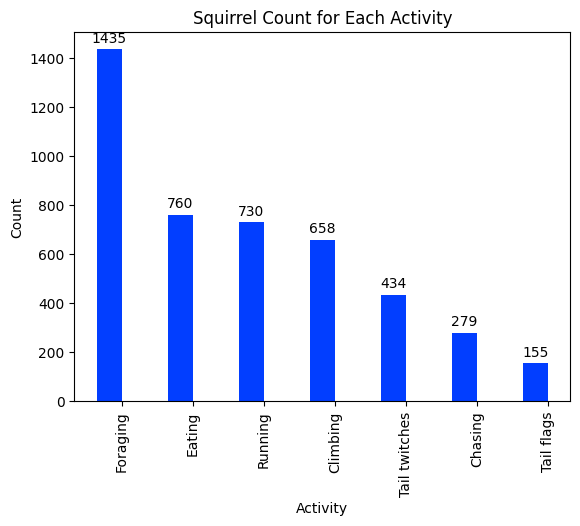

In [109]:
# Get the labels locations using np.arrange(len(Activity)) method.
x = np.arange(len(result2.Activity))
# Set the width of the bars.
width = 0.35 
# Create fig and ax variables using subplots() method, where default nrows and 
# ncols are 1.
fig, ax = plt.subplots()
# Set the Y-axis label of the figure using set_ylabel().
# Changed the fontsize of ylabel.
# Sort value by descending order
result2.sort_values('Count', ascending=False, inplace=True)
ax.set_ylabel('Count', fontsize = 10)
# Set the x-axis label of the figure using set_xlabel().
# Changed the fontsize of xlabel. 
ax.set_xlabel('Activity', fontsize = 10)
# Set the title of the figure, using set_title().
ax.set_title('Squirrel Count for Each Activity')
# Set the X-ticks with x that is created in step 3, using set_xticks method.
ax.set_xticks(x)
# Set the xtick_labels with Activity data, using set_xticklabels method.
ax.set_xticklabels(result2.Activity)
# Rotate tick labels 90 degree if label don't fit properly.
plt.xticks(rotation=90)

# Adding colors to the barplot.
colormap = 'bone'
# Make a plot bar using ax.bar().
pps = ax.bar(x - width/2, result2.Count, width, label='Count') 
for p in pps:
   height = p.get_height()
# Iterate the bar container (from step 10) to annotate to set the value for 
# every bars.
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
#sort value by descending order
result2.sort_values('Count', ascending=False, inplace=True)
# Use plt.show() to show the figure.
plt.show()

### **Seaborn**

Text(0.5, 1.0, 'Squirrel Count for Each Activity')

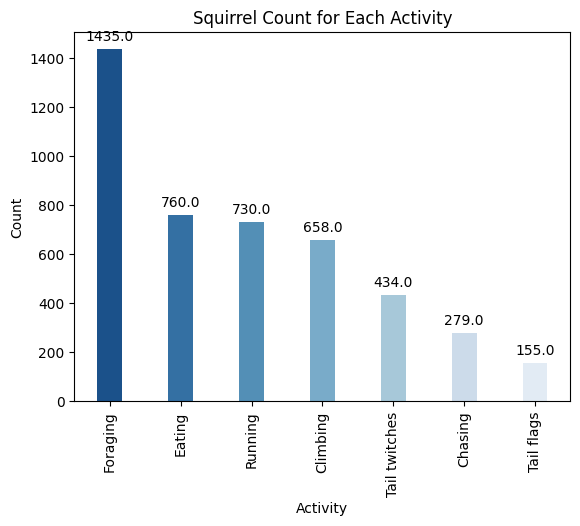

In [110]:
# Creating the barplot with x and y axis, width, remove errorbar that 
# automatically seaborn has as default, and color.
ax = sns.barplot(x="Activity", y="Count", 
                 data=result2, 
                 width=0.35, 
                 errorbar=None, 
                 palette="Blues_r")

# Rotate tick labels 90 degree if label don't fit properly.
plt.xticks(rotation=90)

# Iterate the bar container to annotate to set the value for every bars.
for p in ax.patches:
    ax.annotate(format(p.get_height()),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
    
# Set Title, x and y axis label.
plt.xlabel("Activity")
plt.ylabel("Count")
plt.title("Squirrel Count for Each Activity")




Below is a graph of the Adults, Juvenile, and unknown squirrels that were foraging (searching for food) or not foraging. There were 1273 Adult Squirrels foraging while 1295 Adult Squirrels that were not foraging. There were 118 Juvenile Squirrels that were foraging and 212 Juvenile Squirrels that were not foraging. 44 were unknown for foraging and 81 were unknown that were foraging.

It's really intersting what we see in this graph. In the observed squirrels meetings, the squirrel adults far often beg for food. The reason for this is probably that the young squirrels have not learned yet, that the people can feed them and are more afraid of humans.  

### **Matplotlib**

## **Differenes between matplolib and seaborn**

**Seaborn**

Again, Coding is short and sweet.

Again, a simple code to plot a simple grouped barplot. You can Create the barplot with x and y axis, width, remove errorbar that automatically seaborn has as default, and color all together while using one function sns barplot just need to put it in the same perenthesis.

To add legend just use function hue= the name of column. 

Everything else, setting width adding annotations to show values on top of the bars(accept for matplotlib you have to add text = f'{bar_value:,} for the format), rotation of the x bar label are the same as matplotlib. 

Setting Title, x and y axis label just need to add plt. before each. 

**Matplotlib**

Takes much longer coding then seaborn. 

All function has be done seperatly. 

Must add name for example as and .set before each function. 

To add legend must use function ax.legend()

To add text color to the text value on top of each bar the same as the color of the bar you need to call function bar_color = bar.get_facecolor() and add below it: ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color, size=12) With seaborn I had trouble doing this. 






**PLEASE NOTE I HAD TROUBLE SETTING THE TEXT ON TOP OF THE BARS THE SAME COLOR AS THE BARS IN SEABORN AS I WAS ABLE TO IN MATPLOTLIB. I GOOGLED, NO SUCCESS IN FINDING THE ANSWER AND EVEN POST ON SLACK. I USED bar_color = ax.patches[0].get_facecolor() WHICH TURN ALL TEXT ABOVE THE BARS BLUE AND bar_color = bar.get_facecolor() JUST TURNED ALL TEXT ABOVE THE BARS GREEN. PLEASE ADVISE ON HOW TO DO THIS. THANK YOU.**

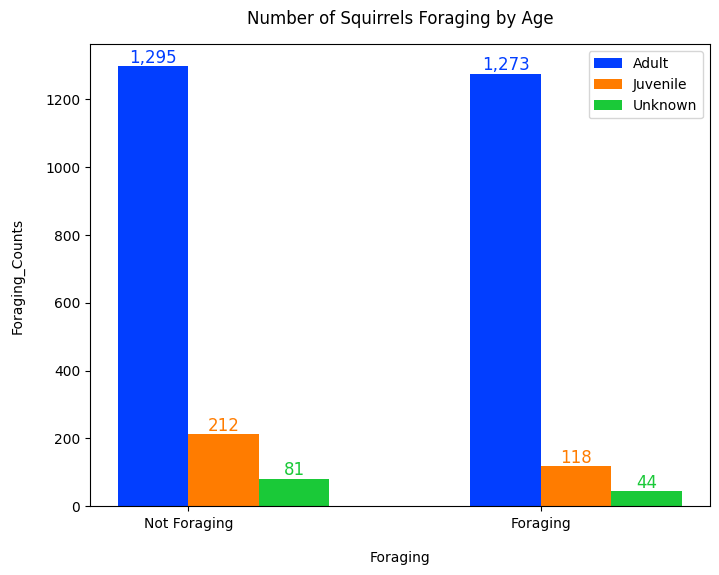

In [111]:
fig, ax = plt.subplots(figsize=(8, 6))
x = np.arange(len(resultforaging.Foraging.unique()))

# Define bar width. We'll use this to offset the second bar.
bar_width = 0.20

# Note we add the `width` parameter now which sets the width of each bar.
b1 = ax.bar(x, resultforaging.loc[resultforaging['Age'] == 'Adult', 'Foraging_Counts'],
            width=bar_width, label='Adult')
# Same thing, but offset the x by the width of the bar.
b2 = ax.bar(x + bar_width, resultforaging.loc[resultforaging['Age'] == 'Juvenile', 'Foraging_Counts'],
            width=bar_width, label='Juvenile')
# Same thing, but offset the x by the width of the bar.
b3 = ax.bar(x + bar_width + bar_width, resultforaging.loc[resultforaging['Age'] == 'Unknown', 'Foraging_Counts'],
            width=bar_width, label='Unknown')
# Add legend.
ax.legend()
# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(resultforaging.Foraging.unique())
# Add axis and chart labels.
ax.set_xlabel('Foraging', labelpad=15)
ax.set_ylabel('Foraging_Counts', labelpad=15)
ax.set_title('Number of Squirrels Foraging by Age', pad=15)

# For each bar in the chart, add a text label.
for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:,}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)

### **Seaborn**

Text(0.5, 1.0, 'Number of Squirrels Foraging by Age')

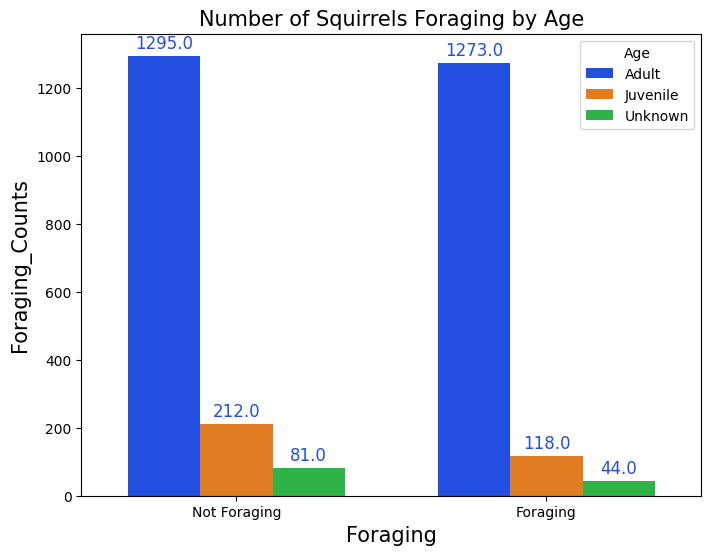

In [112]:
# Code to plot a simple grouped barplot
plt.figure(figsize=(8, 6))
sns.set_palette("bright")
ax=sns.barplot(x="Foraging", y="Foraging_Counts", 
               data=resultforaging, 
                width = 0.70,
                hue='Age')

# Add text annotations to the top of the bars.
# Grab the color of the bars so we can make the
# text the same color.
# bar_color = bar.get_facecolor()
bar_color = ax.patches[0].get_facecolor()
for p in ax.patches:
    ax.annotate(format(p.get_height()),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', color=bar_color,
                   size=12, xytext=(0, 9), 
                   textcoords='offset points')

  
plt.xlabel("Foraging", size=15)
plt.ylabel("Foraging_Counts", size=15)
plt.title("Number of Squirrels Foraging by Age", size=15)

# **Conclusions**
After exploring your dataset, provide a short summary of what you noticed from this dataset. What would you explore further with more time?

This data set contains squirrel data for each of the 3,023 sightings, including location coordinates, age, primary and secondary fur color, elevation, activities, communications, and interactions between squirrels and with humans. 

For squirrels activity there were 1435 squirrels that were foraging, 760 eating, 730 running, 658 climbing, 434 Tail twitches, 279 chasing, and 155 Tail flags.

For squirrels sound there were 102 squirrels that made Kuks sound, 50 that made Quaas, and 3 that Moans.

For squirrels behavior towards human there were 1454 squirrel that reacted indifferent towards human, 678 ran away from human, and 178 approach humans.

I would further like to find out how many squirrels were sighted for each day and how many were sighted AM and PM. I would like to also find out how many were adults and juvinile. Also I would like to find out the count of squirrel  primary vs secondary fur color. 

I am looking forward to creating visualization of these analysis. 